# Lab 03.2: Filtering Data

This lab is presented with some revisions from [Dennis Sun at Cal Poly](https://web.calpoly.edu/~dsun09/index.html) and his [Data301 Course](http://users.csc.calpoly.edu/~dsun09/data301/lectures.html)

### When you have filled out all the questions, submit via [Tulane Canvas](https://tulane.instructure.com/)

In [ ]:
%matplotlib inline

import pandas as pd
pd.options.display.max_rows = 5

from google.colab import drive
drive.mount('/content/drive')
titanic_df = pd.read_csv("/content/drive/My Drive/cmps3160/_labs/data/titanic.csv")
titanic_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In the previous chapter, we only analyzed one variable at a time, but we always analyzed _all_ of the observations in a data set. But what if we want to analyze, say, only the passengers on the Titanic who were _male_? To do this, we have to **filter** the data. That is, we have to remove the rows of the `titanic_df` `DataFrame` where `sex` is not equal to `"male"`. In this section, we will learn several ways to obtain such a subsetted `DataFrame`.

## Two Ways to Filter a DataFrame

One way to filter a `pandas` `DataFrame`, that uses a technique we learned in Chapter 1, is to set the filtering variable as the index and select the value you want using `.loc`.

So for example, if we wanted a `DataFrame` with just the male passengers, we could do:

In [ ]:
males = titanic_df.set_index("sex").loc["male"]
males

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
sex,,,,,,,,,,,,,
male,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.550,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
male,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.550,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
male,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.225,NaN,C,NaN,NaN,NaN
male,3,0,"Zimmerman, Mr. Leo",29.0000,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


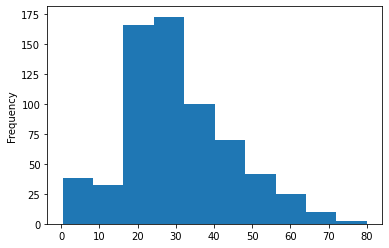

In [ ]:
males.age.plot.hist()

The more common way to filter a `DataFrame` is to use a **boolean mask**. A boolean mask is simply a `Series` of booleans whose index matches the index of the `DataFrame`.

The easiest way to create a boolean mask is to use one of the standard comparison operators `==`, `<`, `>`, and `!=` on an existing column in the `DataFrame`. For example, the following code produces a boolean mask that is equal to `True` for the male passengers and `False` otherwise.

In [ ]:
titanic_df.sex == "male"

0       False
1        True
        ...  
1307     True
1308     True
Name: sex, Length: 1309, dtype: bool

Notice that the equality operator `==` is not being used in the usual sense, i.e., to determine whether the object `titanic_df.sex` is the string `"male"`. This makes no sense, since `titanic_df.sex` is a `Series`. Instead, the equality operator is being _broadcast_ over the elements of `titanic_df.sex`. As a result, we end up with a `Series` of booleans that indicates whether _each_ element of `titanic_df.sex` is equal to `"male"`.

This boolean mask can then be passed into a `DataFrame` to obtain just the subset of rows where the mask equals `True`.

In [ ]:
titanic_df[titanic_df.sex == "male"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.550,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0000,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


How can we tell that it worked? For one, notice that the index is missing the numbers 0 and 2; that's because passengers 0 and 2 in the original `DataFrame` were female. Also, the index goes up to 1308, but there are only 843 rows in this `DataFrame`. 

In this new `DataFrame`, the variable `sex` should only take on one value, `"male"`. Let's check this.

In [ ]:
titanic_df[titanic_df.sex == "male"]["sex"].value_counts()

male    843
Name: sex, dtype: int64

Now we can analyze this subsetted `DataFrame` using the techniques we learned in Chapter 1. For example, the following code produces a histogram of the ages of the male passengers on the Titanic:

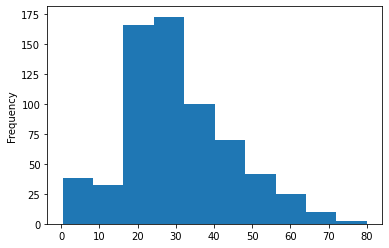

In [ ]:
titanic_df[titanic_df.sex == "male"].age.plot.hist()

Boolean masks are also compatible with `.loc` and `.iloc`:

In [ ]:
titanic_df.loc[titanic_df.sex == "male"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.550,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0000,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


The ability to pass a boolean mask into `.loc` or `.iloc` is useful if we want to select columns at the same time that we are filtering rows. For example, the following code returns the ages of the male passengers:

In [ ]:
titanic_df.loc[titanic_df.sex == "male", "age"]

1        0.9167
3       30.0000
         ...   
1307    27.0000
1308    29.0000
Name: age, Length: 843, dtype: float64

Of course, this result could be obtained another way; we could first apply the boolean mask and then select the column from the subsetted `DataFrame`, the same way we would select a column from any other `DataFrame`:

In [ ]:
titanic_df[titanic_df.sex == "male"]["age"]

1        0.9167
3       30.0000
         ...   
1307    27.0000
1308    29.0000
Name: age, Length: 843, dtype: float64

### Speed Comparison

We've just seen two ways to filter a `DataFrame`. Which is better?

One consideration is that the first method forces you to set the index of your `DataFrame` to the variable you want to filter on. If your `DataFrame` already has a natural index, you might not want to replace that index just to be able to filter the data.

Another consideration is speed. Let's test the runtimes of the two options by using the `%timeit` magic. (**Warning:** The cell below will take a while to run, since `timeit` will run each command multiple times and report the mean and standard deviation of the runtimes.)

In [ ]:
%timeit titanic_df.set_index("sex").loc["male"].age.mean()
%timeit titanic_df[titanic_df.sex == "male"].age.mean()

1000 loops, best of 5: 1.38 ms per loop
1000 loops, best of 5: 765 µs per loop


So boolean masking is also significantly faster than re-indexing and selecting. All things considered, boolean masking is the best way to filter your data.

### Working with Boolean Series

Remember that a boolean mask is a `Series` of booleans. A boolean variable is usually regarded as categorical, but it can also be regarded as quantitative, where `True`s are 1s and `False`s are 0s. For example, the following command actually produces a `Series` of 0s and 3s.

In [ ]:
(titanic_df.sex == "male") * 3

0       0
1       3
       ..
1307    3
1308    3
Name: sex, Length: 1309, dtype: int64

How can we use the dimorphic nature of booleans to our advantage? In Chapter 1.2, we saw how we functions like `.sum()` and `.mean()` could be applied to a binary categorical variable whose categories are coded as 0 and 1, such as the `survived` variable in the Titanic data set. The sum tells us the _number_ of observations in category 1, while the mean tells us the _proportion_ in category 1.

Since boolean `Series` are essentially variables of 0s and 1s, the command

In [ ]:
(titanic_df.sex == "male").sum()

843

returns the _number_ of observations where `sex == "male"` and

In [ ]:
(titanic_df.sex == "male").mean()

0.6440030557677616

returns the _proportion_ of observations where `sex == "male"`. Check that these answers are correct by some other method.

## Filtering on Multiple Criteria

What if we want to visualize the age distribution of male _survivors_ on the Titanic?" To answer this question, we have to filter the `DataFrame` on two variables, `sex` and `survived`.

We can filter on two or more criteria by combining boolean masks using logical operators. First, let's get the boolean masks for the two filters of interest:

In [ ]:
titanic_df.sex == "male"

0       False
1        True
        ...  
1307     True
1308     True
Name: sex, Length: 1309, dtype: bool

In [ ]:
titanic_df.survived == 1

0        True
1        True
        ...  
1307    False
1308    False
Name: survived, Length: 1309, dtype: bool

Now, we want to combine these two boolean masks into a single mask that is `True` only when _both_ masks are `True`. This can be accomplished with the logical operator `&`.

In [ ]:
(titanic_df.sex == "male") & (titanic_df.survived == 1)

0       False
1        True
        ...  
1307    False
1308    False
Length: 1309, dtype: bool

Verify for yourself that the `True` values in this `Series` correspond to observations where _both_ masks were True.

**Warning**:_ Notice the parentheses around each boolean mask above. These parentheses are necessary because of operator precedence. In Python, the logical operator `&` has higher precedence than the comparison operator `==`, so the command

`titanic_df.sex == "male" & titanic_df.survived == 1`

will be interpreted as 

`titanic_df.sex == ("male" & titanic_df.survived) == 1`

and result in an error. Python does not know how to evaluate `("male" & titanic_df.survived)`, since the logical operator `&` is not defined between a `str` and a `Series`. 

The parentheses ensure that Python evaluates the boolean masks first and the logical operator second:

`(titanic_df.sex == "male") & (titanic_df.survived == 1)`.

It is very easy to forget these parentheses. Unfortunately, the error message that you get is not particularly helpful for debugging the code. If you don't believe me, just try running the offending command (without parentheses)!

Now with the boolean mask in hand, we can plot the age distribution of male survivors on the Titanic:

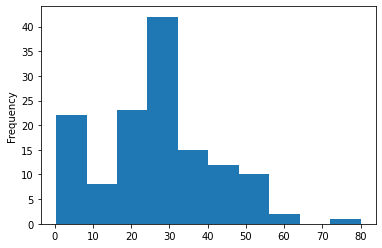

In [ ]:
titanic_df[(titanic_df.sex == "male") & (titanic_df.survived == 1)].age.plot.hist()

Notice the peak between 0 and 10. A disproportionate number of young children survived because they were given priority to board the lifeboats.

Besides `&`, there are two other logical operators, `|` and `~`, that can be used to modify and combine boolean masks.

- `&` means "and"
- `|` means "or"
- `~` means "not"

Like `&`, `|` and `~` operate elementwise on boolean `Series`. Examples are provided below.

In [ ]:
# male OR survived
(titanic_df.sex == "male") | (titanic_df.survived == 1)

0       True
1       True
        ... 
1307    True
1308    True
Length: 1309, dtype: bool

In [ ]:
# equivalent to (titanic_df.sex != "male")
~(titanic_df.sex == "male")

0        True
1       False
        ...  
1307    False
1308    False
Name: sex, Length: 1309, dtype: bool

Notice how we use parentheses to ensure that the boolean mask is evaluated before the logical operators.

# Exercises

Exercises 1-3 deal with the Titanic data set.

**Exercise 1.** Is there any advantage to selecting the column at the same time you apply the boolean mask? In other words, is the second option below any faster than the first?

1. `titanic_df[titanic_df.sex == "female"].age`
2. `titanic_df.loc[titanic_df.sex == "female", "age"]`

Use the `%timeit` magic to compare the runtimes of these two options.

In [ ]:
%timeit titanic_df[titanic_df.sex == "female"].age
%timeit titanic_df.loc[titanic_df.sex == "female", "age"]

#the second option runs in about half the time of the first
#It seems there is advantage to selecting column at the same time as the mask.

The slowest run took 10.92 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 694 µs per loop
The slowest run took 5.80 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 328 µs per loop


**Exercise 2.** Produce a graphic that compares the age distribution of the males who survived with the age distribution of the males who did not.

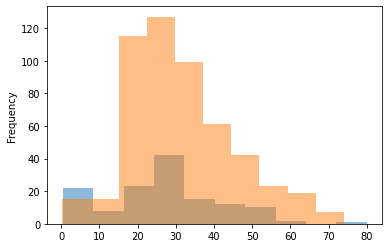

In [ ]:
titanic_df[(titanic_df.sex == "male") & (titanic_df.survived == 1)].age.plot.hist(alpha=.5)
titanic_df[(titanic_df.sex == "male") & (titanic_df.survived == 0)].age.plot.hist(alpha=.5)

**Exercise 3.** What proportion of 1st class passengers survived? What proportion of 3rd class passengers survived? See if you can use boolean masks to do this.

In [ ]:
titanic_df.loc[titanic_df.pclass == 1, "survived"].value_counts()
## 200 out of 323 survived

titanic_df.loc[titanic_df.pclass == 3, "survived"].value_counts()
## 181 out of 709 survived

0    528
1    181
Name: survived, dtype: int64

Exercises 4-7 ask you to analyze the Tips data set (`../data/tips.csv`). The following code reads the data into a `DataFrame` called `tips_df` and creates a new column called `tip_percent` out of the `tip` and `total_bill` columns. This new column represents the tip as a percentage of the total bill (as a number between 0 and 1).

In [ ]:
tips_df = pd.read_csv("/content/drive/My Drive/cmps3160/_labs/data/tips.csv")
tips_df["tip_percent"] = tips_df.tip / tips_df.total_bill
tips_df

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
...,...,...,...,...,...,...,...,...
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2,0.159744


**Exercise 4.** Calculate the average tip percentage paid by parties of 4 or more.

In [ ]:
tips_df[tips_df["size"] >= 4]["tip_percent"].mean()

0.14635885842822238

**Exercise 5.** Make a visualization comparing the distribution of tip percentages left by males and females. How do they compare?

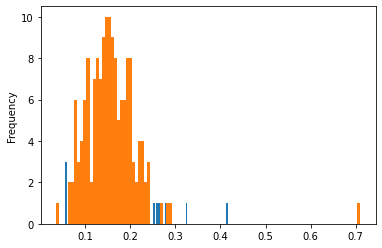

In [ ]:

tips_df[tips_df.sex == "Female"].tip_percent.plot.hist(bins=100)
tips_df[tips_df.sex == "Male"].tip_percent.plot.hist(bins=100)


**Exercise 6.** What is the average table size on weekdays? (_Hint:_ There are at least two ways to create the appropriate boolean mask: using the `|` logical operator and using the `.isin()` method. See if you can do it both ways.)

In [ ]:
tips_df[~(tips_df.day == "Sat") | ~(tips_df.day == "Sun")]["size"].mean()

# other way negate a group of in sat, sun

2.569672131147541

**Exercise 7.** Calculate the average table size for each day of the week. On which day of the week does the waiter serve the largest parties, on average?

In [ ]:
s = tips_df.day.value_counts()
for day in s.keys():
  print(day,": ",end="")
  print( tips_df[day == tips_df.day]["size"].mean() )

#Saturday has the largest parties

Sat : 2.5172413793103448
Sun : 2.8421052631578947
Thur : 2.4516129032258065
Fri : 2.1052631578947367


### When you have filled out all the questions, submit via [Tulane Canvas](https://tulane.instructure.com/)